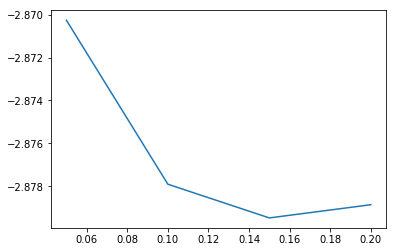

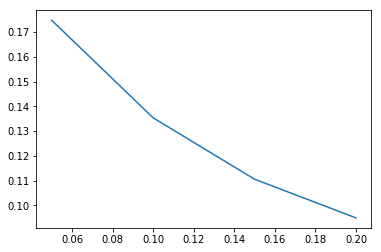

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from QMCP.functions import bootstrap

def six_d_metropolis(alpha, N, n_walkers):
    rn = np.zeros((dim, N, n_walkers))
    r = np.random.randn(dim, n_walkers)
    
    for i in range(N):
        r_trial = r + (0.1*np.random.randn(dim, n_walkers))
        ratio = (trial_wave_function(alpha, r_trial) / trial_wave_function(alpha, r))**2
        eta = np.random.uniform(0,1,(dim,n_walkers))
        rn[:,i,:] = np.where(ratio >= 1, r_trial, (np.where(eta < ratio, r_trial, r)))
        r = np.where(ratio >= 1, r_trial, (np.where(eta < ratio, r_trial, r)))
    rn = rn[:,4000:,:]
    return(rn)

def trial_wave_function(alpha, r):
    r1 = np.linalg.norm(r[:3,:], axis = 0)
    r2 = np.linalg.norm(r[3:,:], axis = 0)
    r12 = np.linalg.norm(r[:3,:]-r[3:,:], axis = 0)
    trial_wave = np.exp(-2*r1 - 2*r2 + r12/(2*(1+alpha*r12)))
    return(trial_wave)

def calc_Eloc(alpha, r):
    r1_unit = r[:3,:,:] / np.linalg.norm(r[:3,:,:], axis = 0)
    r2_unit = r[3:,:,:] / np.linalg.norm(r[3:,:,:], axis = 0)
    r12_unit = r1_unit - r2_unit
    r12 = np.linalg.norm(r[:3,:,:] - r[3:,:,:], axis = 0)
    E_loc = -4 + np.sum(r12_unit * (r[:3,:,:] - r[3:,:,:]), axis = 0) * 1/(r12*(1+alpha*r12)**2) - 1/(r12*(1+alpha*r12)**3) - 1/(4*(1+alpha*r12)**4) + 1/r12
    E_loc = np.reshape(E_loc, E_loc.shape[0]*E_loc.shape[1])
    return(E_loc)


alpha = np.arange(0.05, 0.25, 0.05)
dim = 6
var = np.zeros(len(alpha))
E_ground = np.zeros(len(alpha))
E_ground_error = np.zeros(len(alpha))
k = 4000

for i in range(len(alpha)):
    r = six_d_metropolis(alpha[i], 30000, 400)
    E_local = calc_Eloc(alpha[i], r)
   # E_local = np.reshape(E_local, 300*26000)
   # E_ground_error[i] = bootstrap(E_local[0:1000],100)
    var[i] = np.var(E_local)
    E_ground[i] = np.mean(E_local)

plt.figure()
plt.plot(alpha, E_ground)

plt.figure()
plt.plot(alpha, var)
    





In [8]:
print(var)

[ 0.17479014  0.13538043  0.11056979  0.09492996]
